# Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Importing Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [16,6]

# Importing Datasets

In [164]:
train = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Data\Train.csv")
test = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Data\Test.csv")

In [165]:
train["source"] = "training"
test["source"] = "testing"
join = pd.concat([train,test], ignore_index=True)

In [166]:
join.to_csv(r"C:\Users\jaskeerat singh\Desktop\Data\clean.csv")

# Data Preprocessing

In [167]:
df = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Data\clean.csv")

In [168]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})

# Handling Missing(Nan) Values

In [169]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [170]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)
df["Outlet_Size"].fillna("NO INFO", inplace = True)
df["Item_Outlet_Sales"].fillna(df["Item_Outlet_Sales"].mean(), inplace = True)

In [171]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

# Data Info

In [172]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914,testing
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914,testing
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NO INFO,Tier 2,Supermarket Type1,2181.288914,testing
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NO INFO,Tier 2,Supermarket Type1,2181.288914,testing
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NO INFO,Tier 2,Supermarket Type1,2181.288914,testing


In [173]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NO INFO,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training


In [174]:
df.index

RangeIndex(start=0, stop=14204, step=1)

In [175]:
df.shape

(14204, 13)

In [176]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [177]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [178]:
df.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 2
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [180]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1321.864430
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,2181.288914
75%,16.000000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

# Univariate Analysis

In [181]:
print("Count of Items with different Fat Content")
df1 = df.groupby("Item_Fat_Content")["Item_Identifier"].count().to_frame()
df1.rename(columns = {"Item_Identifier":"Total count"}, inplace = True)
df1

Count of Items with different Fat Content


,Total count
Item_Fat_Content,
Low Fat,9185
Regular,5019


C:\Users\jaskeerat singh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


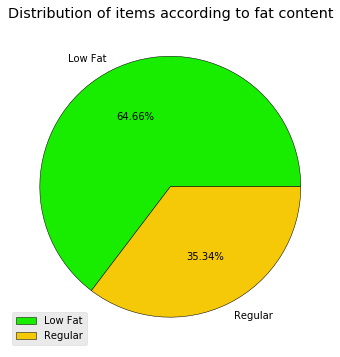

In [182]:
plt.pie(df1, colors = ["#18ed00","#f5c907"], labels = ["Low Fat","Regular"], autopct = "%1.2f%%", wedgeprops={"edgecolor":"Black"})
plt.legend()
plt.title("Distribution of items according to fat content")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Distribution of items according to fat content.png", dpi=300, bbox_inches='tight')
plt.show()

In [183]:
print("Fat Categories according to Year")
df2 = df.groupby(["Outlet_Establishment_Year","Item_Fat_Content"])["Item_Identifier"].count().to_frame()
df2 = df2.unstack()
df2

Fat Categories according to Year


Item_Identifier        
Item_Fat_Content                  Low Fat Regular
Outlet_Establishment_Year                        
1985                                 1578     861
1987                                 1004     549
1997                                 1004     546
1998                                  595     330
1999                                 1003     547
2002                                 1001     547
2004                                 1002     548
2007                                  999     544
2009                                  999     547

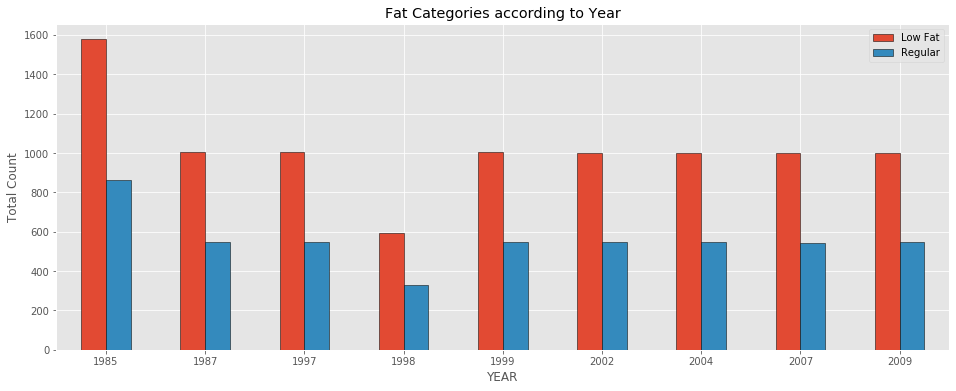

In [184]:
df2.plot.bar(stacked = False, edgecolor = "#000000")
plt.legend(["Low Fat","Regular"])
plt.ylabel("Total Count")
plt.xlabel("YEAR")
plt.xticks(rotation = "horizontal")
plt.title("Fat Categories according to Year")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Fat Categories according to Year.png", dpi=300, bbox_inches='tight')
plt.show()

In [185]:
df3 = df.groupby(["Item_Type","Item_Fat_Content"])["Item_Identifier"].count().to_frame().unstack()
df3

Item_Identifier        
Item_Fat_Content              Low Fat Regular
Item_Type                                    
Baking Goods                    542.0   544.0
Breads                          222.0   194.0
Breakfast                        66.0   120.0
Canned                          549.0   535.0
Dairy                           691.0   445.0
Frozen Foods                    731.0   695.0
Fruits and Vegetables          1086.0   927.0
Hard Drinks                     362.0     NaN
Health and Hygiene              858.0     NaN
Household                      1548.0     NaN
Meat                            282.0   454.0
Others                          280.0     NaN
Seafood                          53.0    36.0
Snack Foods                    1141.0   848.0
Soft Drinks                     617.0   109.0
Starchy Foods                   157.0   112.0

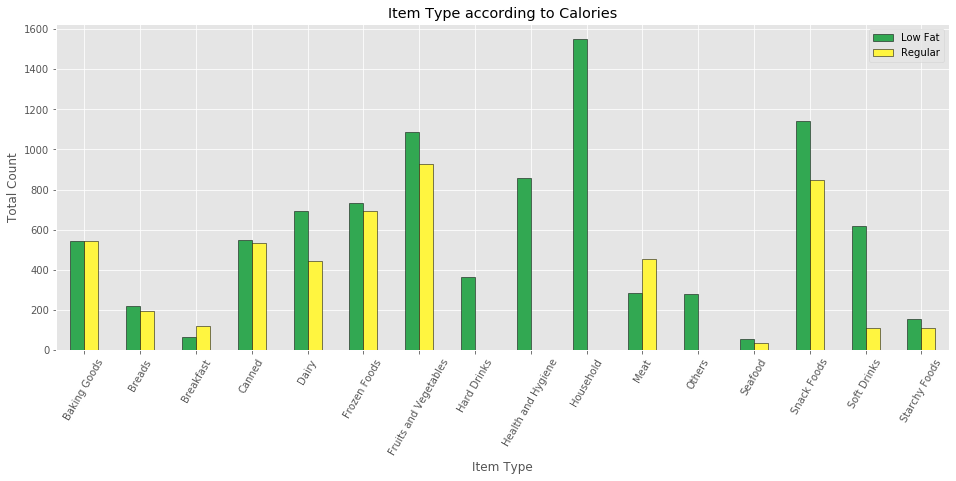

In [186]:
df3.plot.bar(stacked = False, edgecolor = "#000000", color = ["#32a852","#fff540"])
plt.xlabel("Item Type")
plt.ylabel("Total Count")
plt.title("Item Type according to Calories")
plt.legend(["Low Fat","Regular"])
plt.xticks(rotation = 60)
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Item Type according to Calories.png", dpi=300, bbox_inches='tight')
plt.show()

In [187]:
print("Total sales for all the Outlets:- ")
df4 = df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].sum().to_frame()
df4

Total sales for all the Outlets:- 


,Item_Outlet_Sales
Outlet_Identifier,
OUT010,9.954171e+05
OUT013,3.497244e+06
OUT017,3.513321e+06
OUT018,3.199859e+06
OUT019,9.475078e+05
OUT027,4.815050e+06
OUT035,3.620522e+06
OUT045,3.386943e+06
OUT046,3.470794e+06


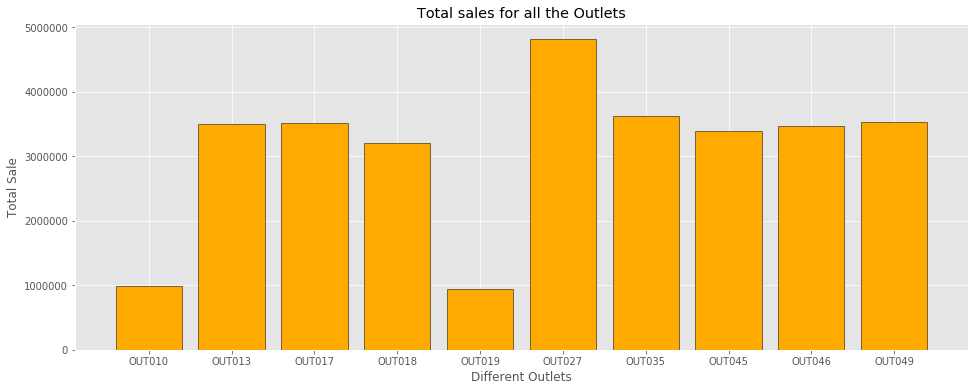

In [188]:
plt.bar(df4.index, df4["Item_Outlet_Sales"], color = "#ffaa00", edgecolor = "#000000")
plt.xlabel("Different Outlets")
plt.ylabel("Total Sale")
plt.title("Total sales for all the Outlets")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Total sales for all the Outlets.png", dpi=300, bbox_inches='tight')
plt.show()

In [189]:
print("Sales for different Outlet Type:-")
df5 = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().to_frame()
df5

Sales for different Outlet Type:-


,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1.942925e+06
Supermarket Type1,2.102519e+07
Supermarket Type2,3.199859e+06
Supermarket Type3,4.815050e+06


C:\Users\jaskeerat singh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


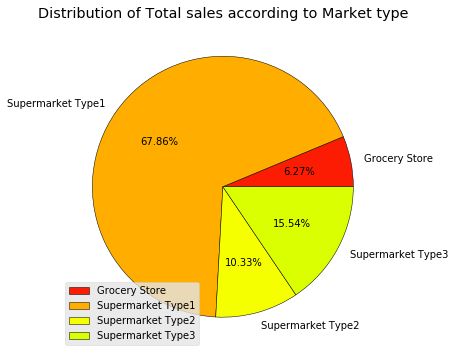

In [190]:
plt.pie(df5, labels = df5.index, colors = ["#fc1c03","#ffae00","#f6ff00","#d9ff00"], autopct = "%1.2f%%", wedgeprops={"edgecolor":"Black"})
plt.title("Distribution of Total sales according to Market type")
plt.legend(loc = "lower left")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Distribution of Total sales according to Market type.png", dpi=300, bbox_inches='tight')
plt.show()

In [191]:
print("Money Collected for Different Items according to Stores:-")
df6 = df.groupby(["Item_Type","Outlet_Type"])["Item_Outlet_Sales"].sum().to_frame().unstack()
df6

Money Collected for Different Items according to Stores:-


Item_Outlet_Sales                                      \
Outlet_Type               Grocery Store Supermarket Type1 Supermarket Type2   
Item_Type                                                                     
Baking Goods              142616.617533      1.512766e+06     232310.811792   
Breads                     67137.148439      6.110877e+05      93868.121644   
Breakfast                  23112.812195      2.649538e+05      39946.361709   
Canned                    154455.182101      1.626590e+06     235114.546057   
Dairy                     138334.882965      1.722356e+06     263376.373992   
Frozen Foods              220786.302967      2.069207e+06     318838.923242   
Fruits and Vegetables     290725.137807      3.035690e+06     446699.976340   
Hard Drinks                49461.515272      5.285953e+05      86527.548531   
Health and Hygiene        113948.267257      1.210089e+06     183009.472862   
Household                 213847.642059      2.344636e+06     355501.277891   
Meat                      101921.818975      1.060929e+06     164456.699634   
Others                     36135.297276      3.993868e+05      58885.298936   
Seafood                     2284.359800      1.470524e+05      28710.346141   
Snack Foods               254456.039962      3.036745e+06     468486.668281   
Soft Drinks                94899.626375      1.024114e+06     162659.295862   
Starchy Foods              38802.210617      4.309961e+05      61467.655676   

                                         
Outlet_Type           Supermarket Type3  
Item_Type                                
Baking Goods              333236.642479  
Breads                    141056.849990  
Breakfast                  70063.952822  
Canned                    376852.278452  
Dairy                     388831.967387  
Frozen Foods              460237.379096  
Fruits and Vegetables     750531.301686  
Hard Drinks               116039.799331  
Health and Hygiene        275429.298975  
Household                 533171.083264  
Meat                      268639.392926  
Others                     73233.263704  
Seafood                    25353.382541  
Snack Foods               694135.097027  
Soft Drinks               224167.359575  
Starchy Foods              84071.284217

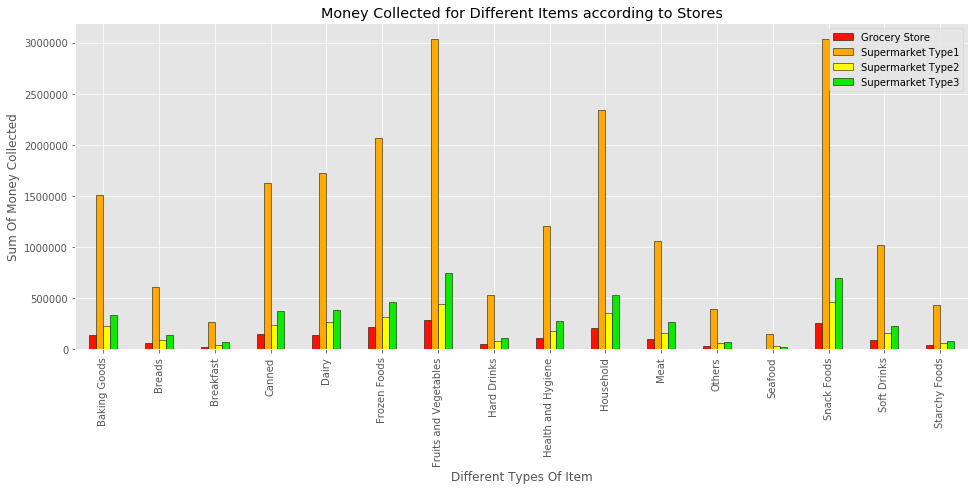

In [192]:
df6.plot.bar(stacked = False, edgecolor = "#000000", color = ["#ff1100","#ffaa00","#ffff00","#0fe800"])
plt.xlabel("Different Types Of Item")
plt.ylabel("Sum Of Money Collected")
plt.title("Money Collected for Different Items according to Stores")
plt.legend(["Grocery Store","Supermarket Type1","Supermarket Type2","Supermarket Type3"])
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Money Collected for Different Items according to Stores.png", dpi=300, bbox_inches='tight')
plt.show()

In [193]:
df7 = df[["Item_Identifier","Item_MRP","Item_Visibility"]]
df7 = df7.drop_duplicates()
df7

,Item_Identifier,Item_MRP,Item_Visibility
0,FDA15,249.8092,0.016047
1,DRC01,48.2692,0.019278
2,FDN15,141.6180,0.016760
3,FDX07,182.0950,0.000000
4,NCD19,53.8614,0.000000
...,...,...,...
14199,FDB58,141.3154,0.013496
14200,FDD47,169.1448,0.142991
14201,NCO17,118.7440,0.073529
14202,FDJ26,214.6218,0.000000


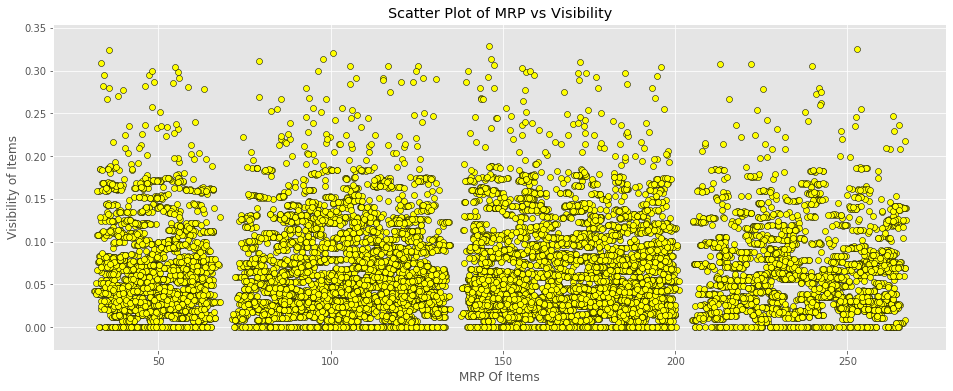

In [194]:
plt.scatter(df7["Item_MRP"], df7["Item_Visibility"], edgecolor = "#000000", color = "#ffff00")
plt.xlabel("MRP Of Items")
plt.ylabel("Visibility of Items")
plt.title("Scatter Plot of MRP vs Visibility")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Scatter Plot of MRP vs Visibility.png", dpi=300, bbox_inches='tight')
plt.show()

In [195]:
df8 = df.groupby("Outlet_Identifier")["Item_Identifier"].count().to_frame()
df8

,Item_Identifier
Outlet_Identifier,
OUT010,925
OUT013,1553
OUT017,1543
OUT018,1546
OUT019,880
OUT027,1559
OUT035,1550
OUT045,1548
OUT046,1550


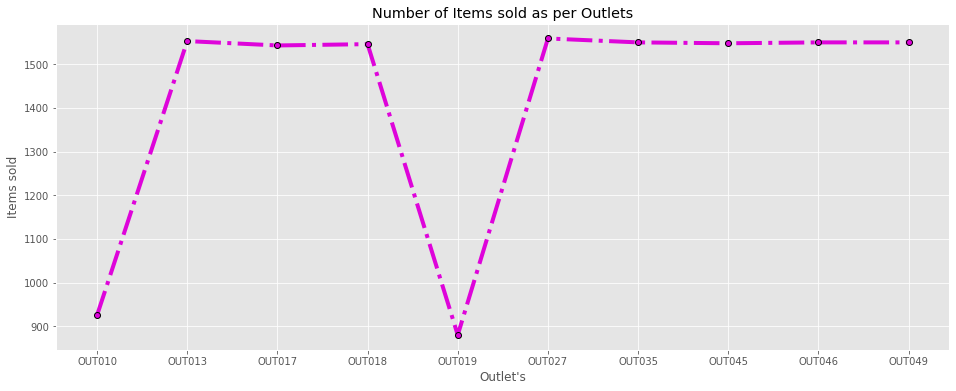

In [196]:
plt.plot(df8, color = "#de04da", ls = "-.", lw = 4, marker = "o", markeredgecolor = "#000000")
plt.xlabel("Outlet's")
plt.ylabel("Items sold")
plt.title("Number of Items sold as per Outlets")
plt.show()

In [197]:
df9 = df.groupby(["Outlet_Size","Outlet_Location_Type"])["Item_Identifier"].count().to_frame().unstack()
df9

Item_Identifier                
Outlet_Location_Type          Tier 1  Tier 2  Tier 3
Outlet_Size                                         
High                             NaN     NaN  1553.0
Medium                        1550.0     NaN  3105.0
NO INFO                          NaN  3091.0   925.0
Small                         2430.0  1550.0     NaN

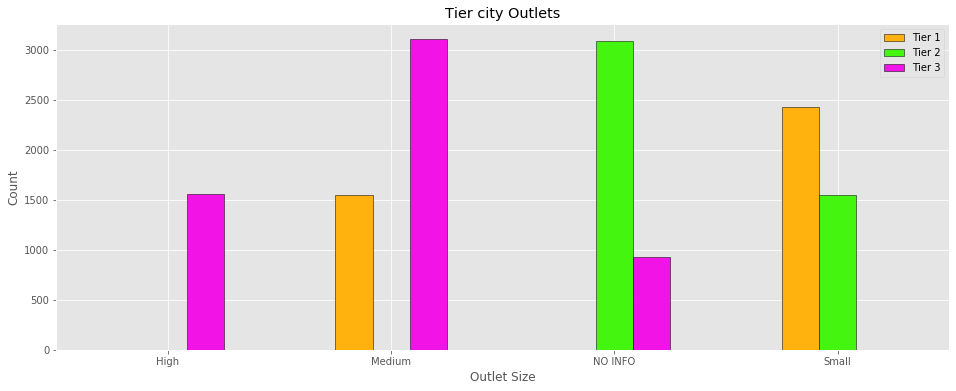

In [198]:
df9.plot.bar(stacked = False, color = ["#ffb20d","#44f50f","#f213e7"], edgecolor = "#000000")
plt.legend(["Tier 1","Tier 2","Tier 3"])
plt.xlabel("Outlet Size")
plt.ylabel("Count")
plt.title("Tier city Outlets")
plt.xticks(rotation = "horizontal")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Tier city Outlets.png", dpi=300, bbox_inches='tight')
plt.show()

In [199]:
print("Location Type - Outlet Type - Outlet Size")
df10 = df.groupby(["Outlet_Location_Type","Outlet_Type","Outlet_Size"]).size().to_frame()
df10

Location Type - Outlet Type - Outlet Size


0
Outlet_Location_Type Outlet_Type       Outlet_Size      
Tier 1               Grocery Store     Small         880
                     Supermarket Type1 Medium       1550
                                       Small        1550
Tier 2               Supermarket Type1 NO INFO      3091
                                       Small        1550
Tier 3               Grocery Store     NO INFO       925
                     Supermarket Type1 High         1553
                     Supermarket Type2 Medium       1546
                     Supermarket Type3 Medium       1559

Correlation of Data among Different Values:- 


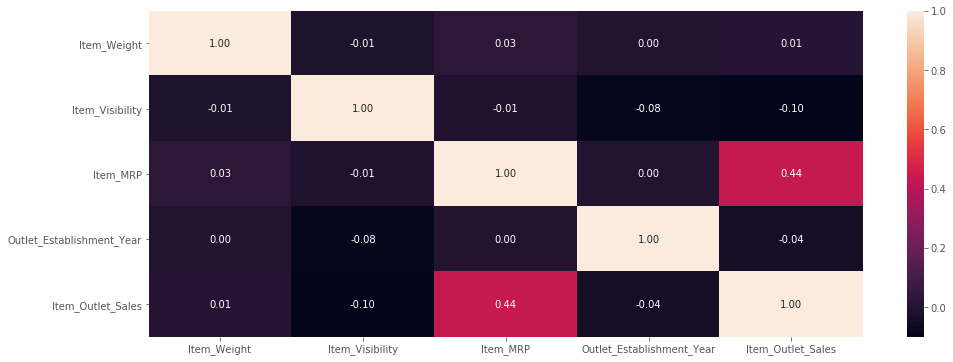

In [200]:
print("Correlation of Data among Different Values:- ")
sns.heatmap(df.corr(), fmt = '.2f',annot = True)
plt.show()

In [201]:
print("Count Of Items Distributed According to Item Type:- ")
df11 = df.groupby(["Item_Type","Item_Identifier"]).size().to_frame()
df11

Count Of Items Distributed According to Item Type:- 


0
Item_Type     Item_Identifier   
Baking Goods  FDA11            8
              FDA23            9
              FDA35            8
              FDA36            9
              FDA47            9
...                           ..
Starchy Foods FDG59            9
              FDH35            9
              FDH47            9
              FDI35            8
              FDZ34            8

[1559 rows x 1 columns]

In [202]:
# determining the operation peroid of a time

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

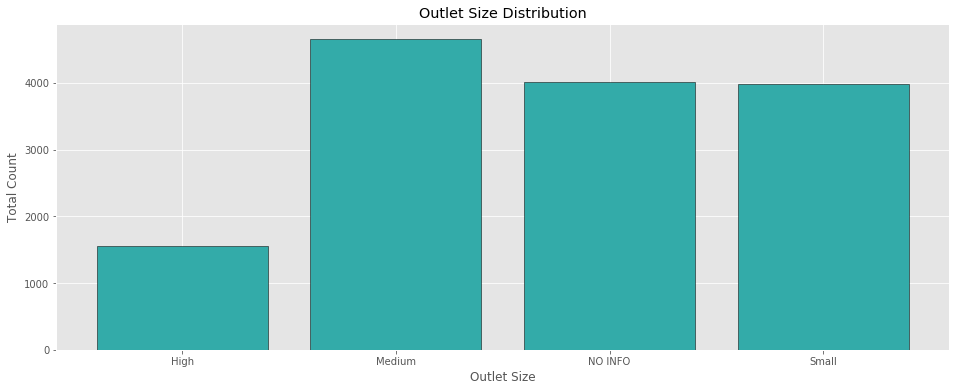

In [203]:
df13 = df.groupby("Outlet_Size").size().to_frame()
df13

plt.bar(df13.index, df13[0], color = "#33aba9", edgecolor = "#000000")
plt.xlabel("Outlet Size")
plt.ylabel("Total Count")
plt.title("Outlet Size Distribution")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\outlet size.png", dpi=300, bbox_inches='tight')
plt.show()

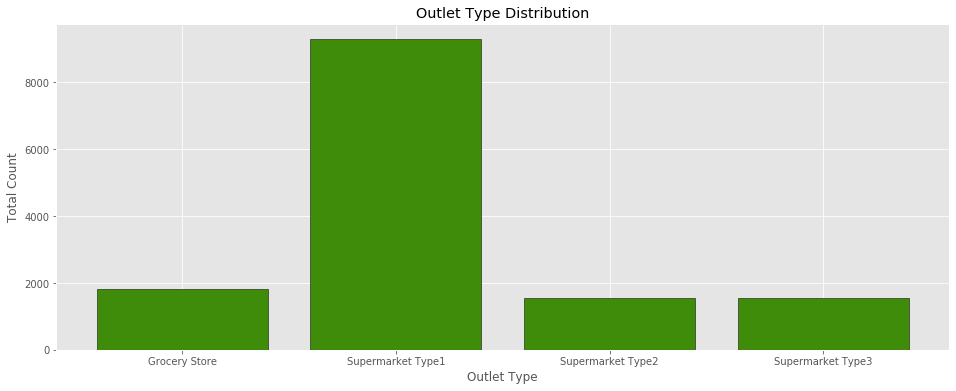

In [204]:
df14 = df.groupby("Outlet_Type").size().to_frame()
df14

plt.bar(df14.index, df14[0], color = "#3f8c0b", edgecolor = "#000000")
plt.xlabel("Outlet Type")
plt.ylabel("Total Count")
plt.title("Outlet Type Distribution")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\outlet type.png", dpi=300, bbox_inches='tight')
plt.show()

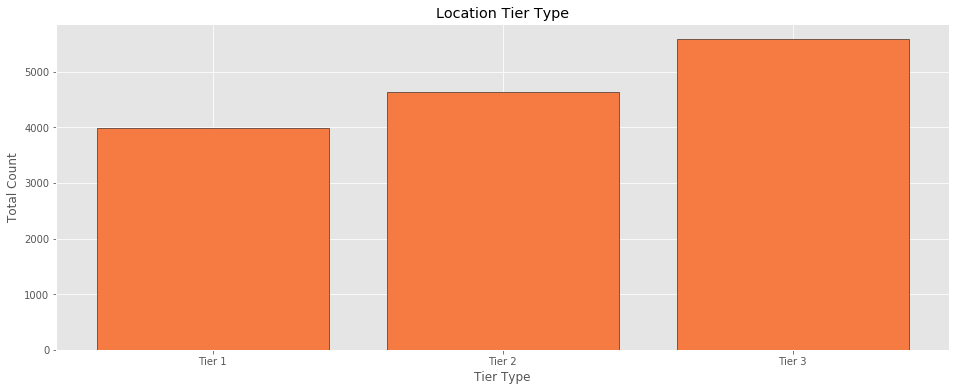

In [205]:
df15 = df.groupby("Outlet_Location_Type").size().to_frame()
df15

plt.bar(df15.index, df15[0], color = "#f57b42", edgecolor = "#000000")
plt.xlabel("Tier Type")
plt.ylabel("Total Count")
plt.title("Location Tier Type")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\tier type.png", dpi=300, bbox_inches='tight')
plt.show()

# Bivariate Analysis

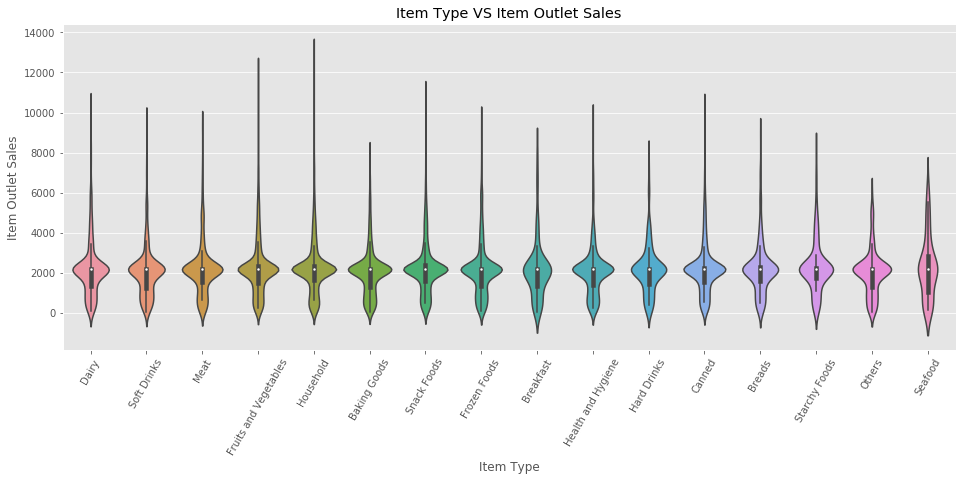

In [206]:
sns.violinplot(x = "Item_Type", y = "Item_Outlet_Sales", data = df)
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.title("Item Type VS Item Outlet Sales")
plt.xticks(rotation = 60)
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\type vs outlet sales.png", dpi=300, bbox_inches='tight')
plt.show()

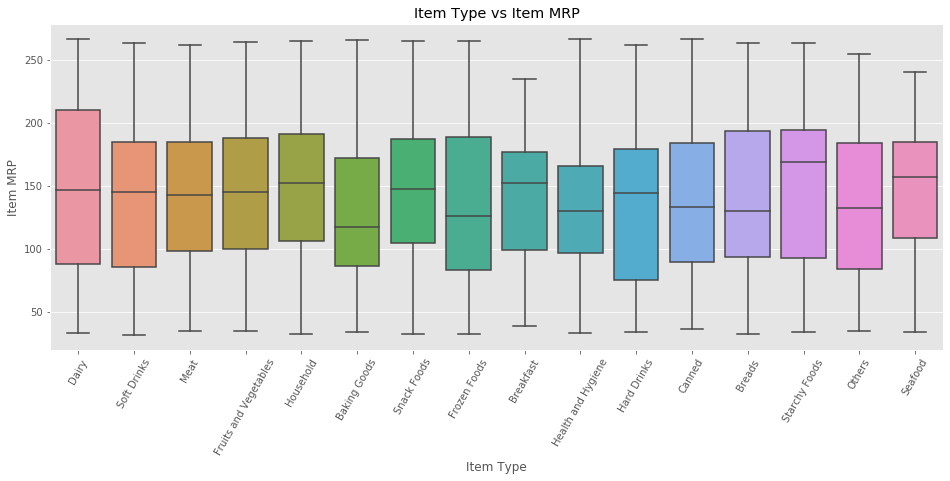

In [207]:
sns.boxplot(x = "Item_Type", y = "Item_MRP", data = df)
plt.xlabel("Item Type")
plt.ylabel("Item MRP")
plt.title("Item Type vs Item MRP")
plt.xticks(rotation = 60)
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\type vs MRP.png", dpi=300, bbox_inches='tight')
plt.show()

In [208]:
df12 = df[["Item_Weight","Item_MRP"]]
df12 = df12.groupby("Item_Weight")["Item_MRP"].mean().to_frame()
df12["weight"] = df12.index
df12

,Item_MRP,weight
Item_Weight,,
4.555,111.654400,4.555
4.590,112.857429,4.590
4.610,174.114600,4.610
4.615,232.730000,4.615
4.635,127.942257,4.635
...,...,...
21.000,193.522800,21.000
21.100,145.584313,21.100
21.200,175.160840,21.200


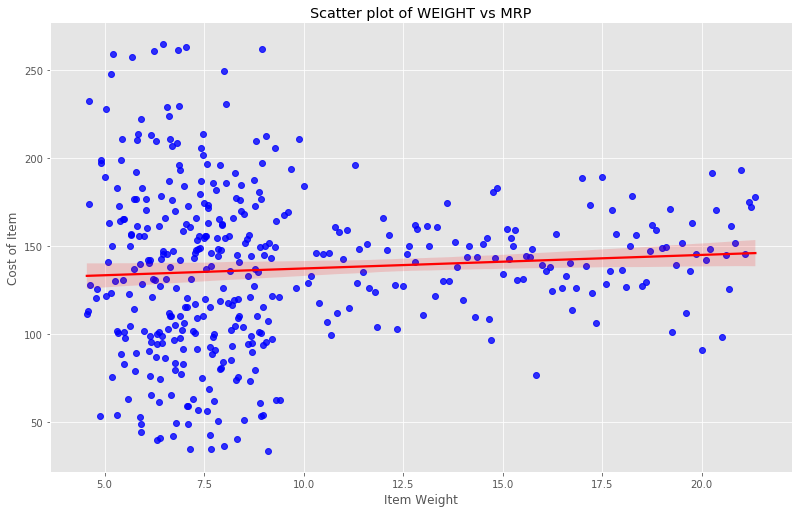

In [209]:
sns.lmplot("weight", "Item_MRP", data = df12, height=7, aspect=1.6,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Item Weight")
plt.ylabel("Cost of Item")
plt.title("Scatter plot of WEIGHT vs MRP")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\Scatter plot of WEIGHT vs MRP.png", dpi=300, bbox_inches='tight')
plt.show()

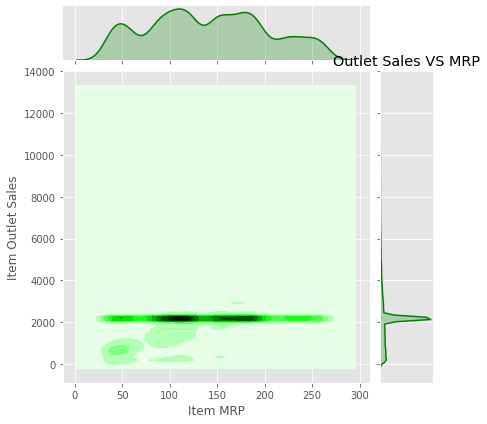

In [210]:
ax = sns.jointplot(x = "Item_MRP", y = "Item_Outlet_Sales", data = df, kind = "kde", color = "green")
ax.set_axis_labels(xlabel = "Item MRP", ylabel = "Item Outlet Sales")
plt.title("Outlet Sales VS MRP")
plt.savefig(r"C:\Users\jaskeerat singh\Desktop\Data\figures\outlet sales vs MRP.png", dpi=300, bbox_inches='tight')
plt.show()

In [211]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NO INFO,Tier 3,Grocery Store,732.3800,training,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training,26


# LABEL ENCODING

In [212]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df["outlet"] = label.fit_transform(df["Outlet_Identifier"])
df["outlet size"] = label.fit_transform(df["Outlet_Size"])
df["item identity"] = label.fit_transform(df["Item_Identifier"])
df["item type"] = label.fit_transform(df["Item_Type"])

# ONE HOT ENCODING

In [213]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns = ["Item_Type","Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type"])

# Data Modelling

In [214]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics

In [215]:
training = df.loc[df["source"] == "training"]
testing = df.loc[df["source"] == "testing"]

training.to_csv(r"C:\Users\jaskeerat singh\Desktop\Data\training_mod.csv", index=False)
testing.to_csv(r"C:\Users\jaskeerat singh\Desktop\Data\testing_mod.csv", index=False)

In [216]:
training = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Data\training_mod.csv")
training.drop("source", axis = 1, inplace = True)
testing.drop("source", axis = 1, inplace = True)

C:\Users\jaskeerat singh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [217]:
training.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,outlet,outlet size,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NO INFO,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,14,9,1,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,4,3,1,...,0,1,0,1,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,14,9,1,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,15,0,2,...,0,1,0,0,1,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,26,1,0,...,0,1,1,0,0,0,0,1,0,0


In [218]:
training.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Outlet_Years', 'outlet', 'outlet size', 'item identity', 'item type',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_NO INFO', 'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_

In [219]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Item_Outlet_Sales                8523 non-null   float64
 7   Outlet_Years                     8523 non-null   int64  
 8   outlet                           8523 non-null   int64  
 9   outlet size                      8523 non-null   int64  
 10  item identity                    8523 non-null   int64  
 11  item type                        8523 non-null   int64  
 12  Item_Type_Baking Goo

# Linear Regression

In [220]:
X = training.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"], axis=1)
y = training["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [221]:
linear = LinearRegression()
linear.fit(X_train,y_train)

y_pred = linear.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1100.6333316017365

In [222]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
c = 111111111111111111111
d = 0
for i in range(2,12):
    sc = cross_val_score(lr, X, y, cv=i, scoring='neg_root_mean_squared_error')
    sc = -sc
    print(i,") ",sc.mean())
    if sc.mean()<c:
        c=sc.mean()
        d=i
print('\nBest number of kfolds for cross validation is ',d,'\n')

2 )  1137.4154208323744
3 )  1133.7796242591
4 )  1134.6969252714357
5 )  1132.77179011808
6 )  1132.4110199818208
7 )  1131.5547832094915
8 )  1131.72813395384
9 )  1131.7397025116431
10 )  1132.153258797234
11 )  1131.5096373936817

Best number of kfolds for cross validation is  11 



# Regularized Linear Regression

In [223]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

rlr = Ridge(alpha = 0.03)
rlr.fit(X_train, y_train) 

pred_train_rlr = rlr.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_rlr)))

pred_test_rlr = rlr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_rlr)))

1146.5585744640541
1100.6295270559942


# Random Forest

In [224]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

forest_train_predict = forest.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, forest_train_predict)))

forest_test_predict = forest.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forest_test_predict)))

435.05641087274086
1111.433963232628


# Predicting Values

In [225]:
t = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Data\testing_mod.csv")

use = t.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales","source"], axis=1)
value = linear.predict(use)

In [226]:
value

array([1848.86375479, 1530.51482046, 1913.5217265 , ..., 1859.46895331,
       3643.78602979, 1290.89884878])